In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
"""
Average Degree (K) = exp(ln(Number of Nodes(N))/Average Path Length(L))
"""


# Initialize β with an initial value
beta = 0.2

# Set the learning rate (step size)
learning_rate = 0.1

# Set the convergence threshold
convergence_threshold = 0.25

# Define the desired average path length
target_average_path_length = 2.1

# Generate the initial Watts-Strogatz graph
N = 100  # Number of nodes
K = int(np.ceil(np.exp(np.log(N)/target_average_path_length))) # Average degree

print(K)
print(target_average_path_length)
graph = nx.watts_strogatz_graph(N, K, beta)

# Calculate the initial average path length
initial_average_path_length = nx.average_shortest_path_length(graph)

# Optimization loop
iteration = 0
while abs(initial_average_path_length - target_average_path_length) > convergence_threshold:
    iteration += 1

    # Calculate the gradient
    num_nodes = len(graph.nodes)
    gradient = 2 * (initial_average_path_length - target_average_path_length) / (num_nodes * (num_nodes - 1))

    # Update β using the gradient ascent update rule
    beta += learning_rate * gradient

    # Generate a new Watts-Strogatz graph using the updated β
    graph = nx.watts_strogatz_graph(N, K, beta)

    # Calculate the new average path length
    new_average_path_length = nx.average_shortest_path_length(graph)

    # Check for convergence
    if abs(new_average_path_length - target_average_path_length) < convergence_threshold:
        break
    if(beta>1):
        beta=1
        break
    if(beta<0):
        beta=0
        break
    # Print the current iteration and β value
    print(f"Iteration: {iteration}, β: {beta}, Average Path Length: {new_average_path_length}")

# Print the final β value and average path length
print("\nOptimization Complete!")
print(f"Final β: {beta}")
print(f"Final Average Path Length: {new_average_path_length}")

9
2.1
Iteration: 1, β: 0.20001236608509337, Average Path Length: 2.784242424242424
Iteration: 2, β: 0.20002473217018674, Average Path Length: 2.753939393939394
Iteration: 3, β: 0.2000370982552801, Average Path Length: 2.7054545454545456
Iteration: 4, β: 0.20004946434037346, Average Path Length: 2.661010101010101
Iteration: 5, β: 0.20006183042546682, Average Path Length: 2.766060606060606
Iteration: 6, β: 0.2000741965105602, Average Path Length: 2.7383838383838386
Iteration: 7, β: 0.20008656259565355, Average Path Length: 2.7696969696969695
Iteration: 8, β: 0.2000989286807469, Average Path Length: 2.7333333333333334
Iteration: 9, β: 0.20011129476584028, Average Path Length: 2.737171717171717
Iteration: 10, β: 0.20012366085093364, Average Path Length: 2.7224242424242426
Iteration: 11, β: 0.200136026936027, Average Path Length: 2.747878787878788
Iteration: 12, β: 0.20014839302112036, Average Path Length: 2.672323232323232
Iteration: 13, β: 0.20016075910621373, Average Path Length: 2.71292

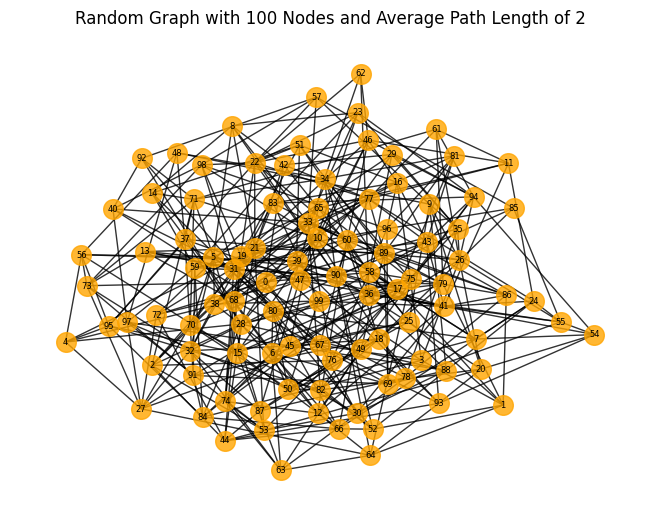

In [2]:
graph = nx.watts_strogatz_graph(N, K, p=beta)

# Draw the graph
pos = nx.spring_layout(graph)
nx.draw(graph, pos=pos, node_size=200, alpha=0.8, node_color='orange')

# Label the nodes with their IDs
labels = {node: str(node) for node in graph.nodes()}
nx.draw_networkx_labels(graph, pos=pos,font_size=6)

plt.axis('off')
plt.title('Random Graph with %d Nodes and Average Path Length of %d' % (num_nodes, new_average_path_length))
plt.show()